# Project 44: Simulating the Izhikevich spiking neuron model usingthe Brian2 software

## Authors: Julen Etxaniz and Ibon Urbina

## Subject: Machine Learning and Neural Networks

## Date: 22/11/2020

## Objective: The goal of the project is to implement the Izhikevich’s model using the Brian2 Python library https://brian2.readthedocs.io/en/stable/.

## Contents
### 1. Importing the libraries
### 2. Defining the model
### 3. Types

# 1. Importing the libraries

In [1]:
%matplotlib inline
from brian2 import *

# 2. Defining the model

In [67]:
def model(a=0.02, b=0.2, c=-65, d=2, V=-65):
    # Parameters
    tau = 0.1*ms
    I = 10
    duration = 20*ms
    
    #Simulation
    eqs = '''
    dv/dt = (0.04*v**2+5*v+140-u+I)/tau : 1
    du/dt = (a*(b*v-u))/tau : 1
    '''
    G = NeuronGroup(1, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    G.v = V
    G.u = b*G.v
    
    statemon = StateMonitor(G, 'v', record=0)
    spikemon = SpikeMonitor(G)

    run(duration)
   
    #Plotting
    plot(statemon.t/ms, statemon.v[0])
    #for t in spikemon.t:
        #axvline(t/ms, ls='--', c='C1')
    axhline(30, ls=':', c='C2', lw=2)
    xlabel('Time (ms)')
    ylabel('v')
    print("Spike times: %s" % spikemon.t[:])

Spike times: [ 0.4  1.   1.8  3.2  5.4  7.6  9.7 11.8 13.9 16.  18.1] ms


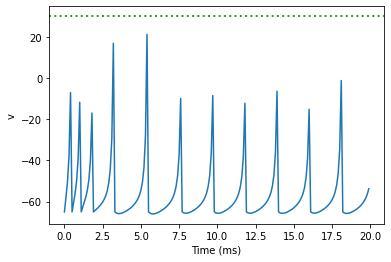

In [58]:
model()

# 3. Neuron Types
<img src="types.gif" alt="Types">

## 3.1. Excitatory

### 3.1.1. Regular Spiking (RS)

Spike times: [ 0.4  3.1  7.8 12.5 17.2] ms


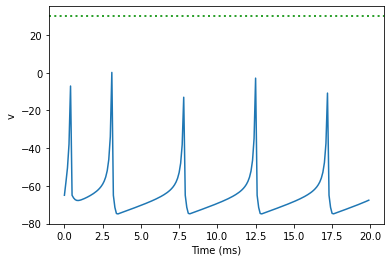

In [59]:
model(d=8)

### 3.1.2. Intrinsically Bursting (IB)

Spike times: [ 0.4  0.8  1.5  5.7  9.1 12.5 15.9 19.3] ms


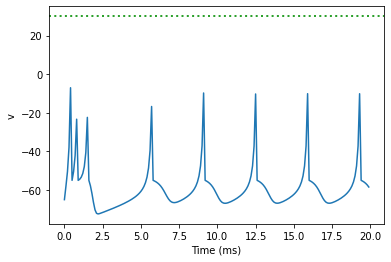

In [60]:
model(c=-55, d=4)

### 3.1.3. Chattering (CH)

Spike times: [ 0.4  0.7  1.   1.4  1.8  2.3  2.9  7.8  8.2  8.6  9.1  9.8 14.8 15.2
 15.6 16.1 16.8] ms


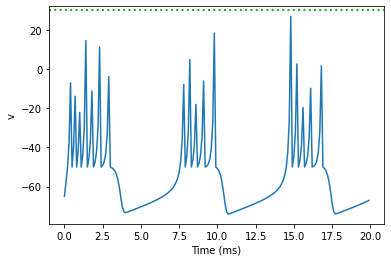

In [61]:
model(c=-50)

## 3.2. Inhibitory

### 3.2.1. Fast Spiking (FS)

Spike times: [ 0.4  1.1  2.   3.   4.1  5.   5.9  6.9  8.   8.9  9.8 10.7 11.6 12.5
 13.4 14.3 15.2 16.1 17.  17.9 18.8 19.7] ms


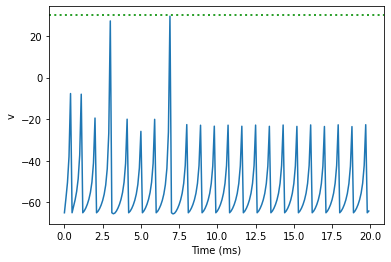

In [62]:
model(a=0.1)

### 3.2.2. Low-Thershold Spiking (LTS)

Spike times: [ 0.3  0.8  1.4  2.1  3.1  4.5  6.   7.5  9.  10.5 12.  13.5 15.  16.5
 18.  19.5] ms


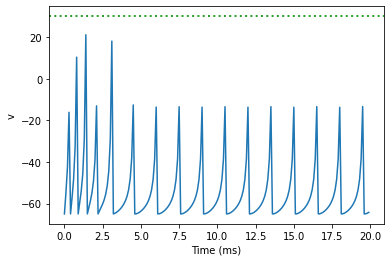

In [63]:
model(b=0.25)

## 3.3. Others

### 3.3.1 Thalamo-Cortical (TC)

Spike times: [ 0.3  0.7  1.1  1.5  1.9  2.4  2.9  3.4  3.9  4.4  4.9  5.4  5.9  6.4
  6.9  7.4  7.9  8.4  8.9  9.4  9.9 10.4 10.9 11.4 11.9 12.4 12.9 13.4
 13.9 14.4 14.9 15.4 15.9 16.4 16.9 17.4 17.9 18.4 18.9 19.4 19.9] ms


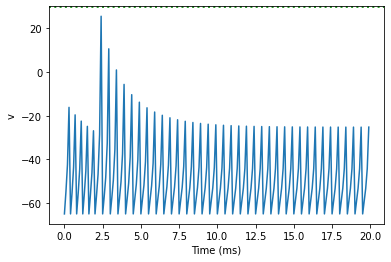

In [64]:
model(b=0.25, d=0.05)

Spike times: [ 0.2  0.5  0.9  1.3  1.7  2.1  2.5  2.9  3.3  3.7  4.1  4.5  5.   5.5
  6.   6.5  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5
 13.  13.5 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5] ms


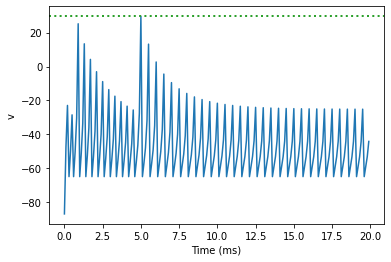

In [66]:
model(b=0.25, d=0.05, V=-87)

### 3.3.2 Resonator (RZ)

Spike times: [ 0.3  0.8  1.4  2.1  2.8  3.5  4.2  4.9  5.6  6.3  7.   7.7  8.4  9.1
  9.8 10.5 11.2 11.9 12.6 13.3 14.  14.7 15.4 16.1 16.8 17.5 18.2 18.9
 19.6] ms


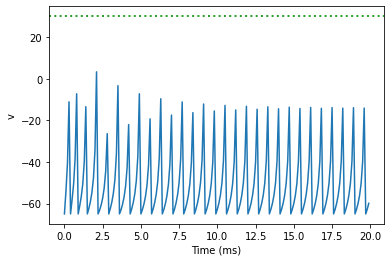

In [65]:
model(a=0.1, b=0.26)